## 01. 선형회귀모델

### 1-1. 단일선형회귀

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch [100/1000], Loss:  17.2847
Epoch [200/1000], Loss:  8.5364
Epoch [300/1000], Loss:  9.6663
Epoch [400/1000], Loss:  9.4931
Epoch [500/1000], Loss:  9.2921
Epoch [600/1000], Loss:  8.9119
Epoch [700/1000], Loss:  8.4449
Epoch [800/1000], Loss:  7.9938
Epoch [900/1000], Loss:  7.6121
Epoch [1000/1000], Loss:  7.3095


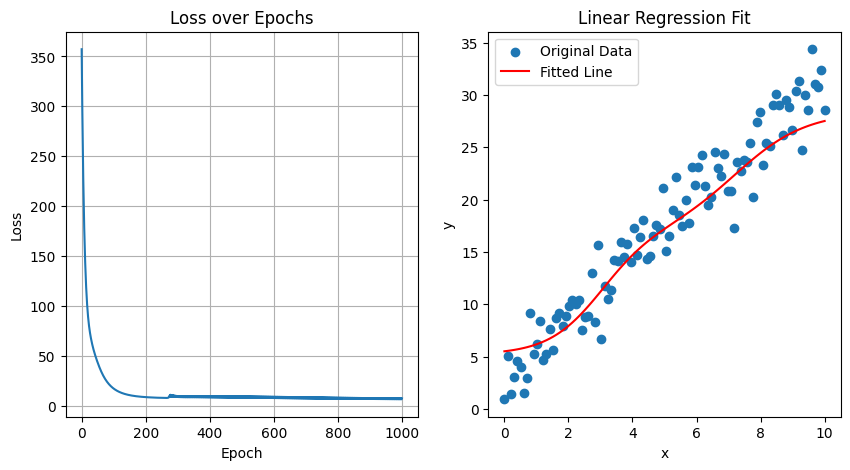

Model Parameters:
hidden.weight: tensor([[0.9124],
        [1.2055]])
hidden.bias: tensor([-6.6362, -3.6426])
output.weight: tensor([[11.4839, 11.7021]])
output.bias: tensor([5.2038])
linear.weight: tensor([[ 0.6289, -0.2620],
        [ 0.6630,  0.1386]])
linear.bias: tensor([ 0.2712, -0.4008])


In [53]:
# 1. 데이터 생성(입출력 정의)
x = torch.linspace(0,10,100).view(-1,1)     # 입력 데이터
y =3 * x + 2 + torch.randn(100, 1) * 2     # 레이블

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super(LinearRegressionModel, self).__init__()
        self.hidden = nn.Linear(1,2)   # 입력 1개, 출력 10개
        # self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(2,1)
        self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개

    def forward(self,x):
        # return self.linear(x)
        x = self.hidden(x)
        # x = self.relu(x)
        x = self.sigmoid(x)
        x = self.output(x)
        return x

model = LinearRegressionModel()     # 모델 객체 생성

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()     # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법    # 모델이 커지면 런닝메이트를 줄여주는 것이 상대적으로 옳다.

# 4. 가중치 업데이트
epochs = 1000    # 학습 반복 횟수
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()   # 기울기 초기화

    outputs = model(x)  # 예측값 계산 → model의 forward 함수 실행
    loss = criterion(outputs, y)    # 손실 계산
    loss.backward()     # 역전파

    optimizer.step()    # 가중치 업데이트

    losses.append(loss.item())      # 손실함수 그래프 그리기용

    # 100번에 한번씩 학습 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
# plt.ylim(0,100)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100/500], Loss:  6278.2661
Epoch [200/500], Loss:  5314.9268
Epoch [300/500], Loss:  4719.6548
Epoch [400/500], Loss:  4315.8765
Epoch [500/500], Loss:  4036.9456


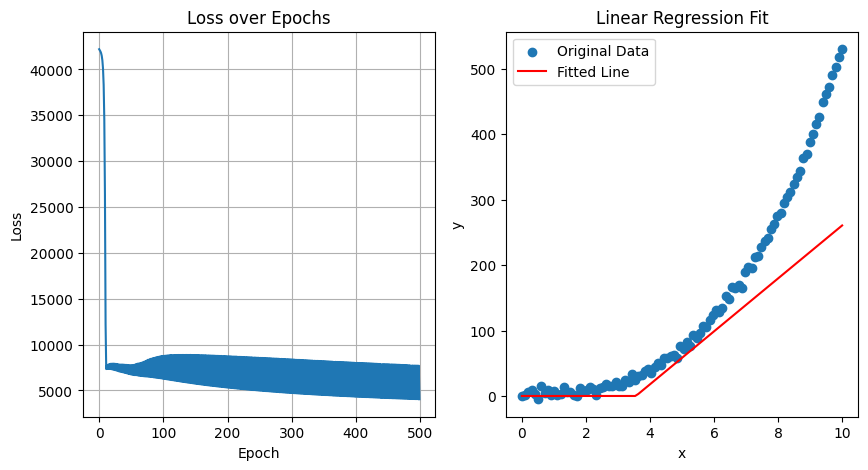

Model Parameters:
model.0.weight: tensor([[-0.9334],
        [-0.8680],
        [ 2.2783],
        [ 0.6914],
        [-0.6995],
        [ 0.5623],
        [ 3.0052],
        [-0.9268],
        [-0.4421],
        [-0.3696]])
model.0.bias: tensor([-9.9563e-01,  8.7614e-01, -7.6519e+00, -2.3291e+00,  5.6128e-03,
        -1.8764e+00, -1.0081e+01,  8.5804e-01, -3.9543e-01, -8.2465e-01])
model.2.weight: tensor([[-3.7460e-03, -8.4496e-03, -7.4920e-02,  1.0440e-01, -2.1105e-01,
         -1.7538e-03,  2.1644e-02,  2.8032e-02,  2.6178e-01,  2.5315e-01],
        [-2.4084e-02, -1.0996e-01, -9.9883e-02, -1.8439e-01,  2.4814e-01,
         -1.1644e-01,  2.2917e-02, -1.4436e-01,  1.4969e-01,  2.7146e-01],
        [ 1.8123e-01,  2.8726e-01,  1.5460e+00,  6.4612e-01, -8.5920e-02,
          3.4115e-01,  2.1346e+00,  3.5893e-02, -2.2997e-01, -4.7348e-03],
        [-1.4831e-01,  8.0116e-02, -5.6988e-02,  1.8785e-01,  7.6048e-02,
         -2.7769e-02, -9.6952e-02, -2.7530e-01,  2.5411e-01,  2.6737e-01],
  

In [46]:
# 단일 선형 회귀의 변형 - 3차 함수

# 1. 데이터 생성(입출력 정의)
x = torch.linspace(0,10,100).view(-1,1)     # 입력 데이터
y = 0.5 * (x ** 3) + 0.3*(x ** 2) + 2 + torch.randn(100, 1) * 5     # 레이블

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super(LinearRegressionModel, self).__init__()
        # self.hidden = nn.Linear(1,10)   # 입력 1개, 출력 10개
        # self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()
        # self.output = nn.Linear(10,1)
        # self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,1)
        )

    def forward(self,x):
        # return self.linear(x)
        # x = self.hidden(x)
        # x = self.relu(x)
        # x = self.sigmoid(x)
        # x = self.output(x)
        # return x
        return self.model(x)

model = LinearRegressionModel()     # 모델 객체 생성

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()     # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.0001)  # 확률적 경사 하강법    # 모델이 커지면 런닝메이트를 줄여주는 것이 상대적으로 옳다.

# 4. 가중치 업데이트
epochs = 500    # 학습 반복 횟수
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()   # 기울기 초기화

    outputs = model(x)  # 예측값 계산 → model의 forward 함수 실행
    loss = criterion(outputs, y)    # 손실 계산
    loss.backward()     # 역전파

    optimizer.step()    # 가중치 업데이트

    losses.append(loss.item())      # 손실함수 그래프 그리기용

    # 100번에 한번씩 학습 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
# plt.ylim(0,100)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100/1000], Loss:  2.8838
Epoch [200/1000], Loss:  2.8675
Epoch [300/1000], Loss:  2.8620
Epoch [400/1000], Loss:  2.8602
Epoch [500/1000], Loss:  2.8595
Epoch [600/1000], Loss:  2.8593
Epoch [700/1000], Loss:  2.8592
Epoch [800/1000], Loss:  2.8592
Epoch [900/1000], Loss:  2.8592
Epoch [1000/1000], Loss:  2.8592
최종 Test Loss :  5.9871


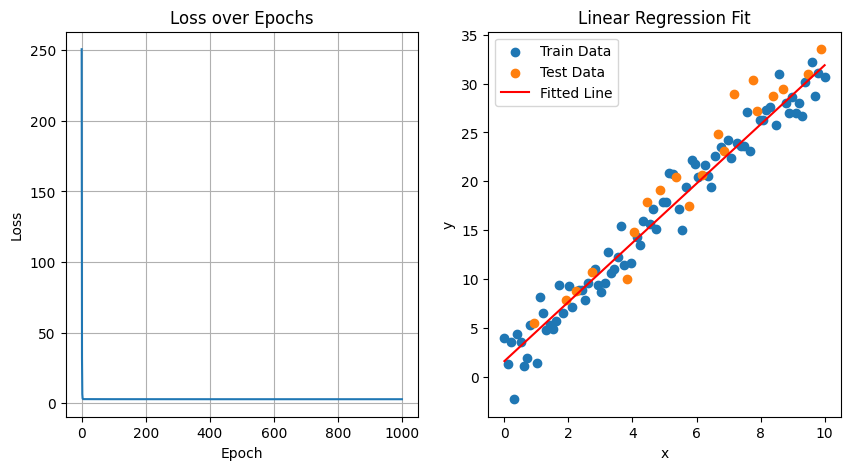

Model Parameters:
linear.weight: tensor([[3.0252]])
linear.bias: tensor([1.6233])


In [24]:
# 단일 선형 회귀의 변형 - Train / Test set 분리

# 1. 데이터 생성(입출력 정의)
x = torch.linspace(0,10,100).view(-1,1)     # 입력 데이터
y =3 * x + 2 + torch.randn(100, 1) * 2     # 레이블

# Train / Test set 분리 (8:2로 분리)
num_train = int(len(x) * 0.8)
indices = torch.randperm(len(x))
train_idx, test_idx = indices[:num_train], indices[num_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]


# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개


    def forward(self,x):
        return self.linear(x)

model = LinearRegressionModel()     # 모델 객체 생성

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()     # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법    # 모델이 커지면 런닝메이트를 줄여주는 것이 상대적으로 옳다.

# 4. 가중치 업데이트
epochs = 1000    # 학습 반복 횟수
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()   # 기울기 초기화

    outputs = model(x_train)  # 예측값 계산 → model의 forward 함수 실행
    loss = criterion(outputs, y_train)    # 손실 계산
    loss.backward()     # 역전파

    optimizer.step()    # 가중치 업데이트

    losses.append(loss.item())      # 손실함수 그래프 그리기용

    # 100번에 한번씩 학습 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 테스트 데이터 평가
with torch.no_grad():
    test_output = model(x_test)
    test_loss = criterion(test_output, y_test)
print(f"최종 Test Loss : {test_loss.item(): .4f}")

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
# plt.ylim(0,200)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x_train.numpy(), y_train.numpy(), label="Train Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Test Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100/1000], Loss:  2.6008
Epoch [200/1000], Loss:  2.2044
Epoch [300/1000], Loss:  2.1701
Epoch [400/1000], Loss:  2.1448
Epoch [500/1000], Loss:  2.1245
Epoch [600/1000], Loss:  2.1081
Epoch [700/1000], Loss:  2.0948
Epoch [800/1000], Loss:  2.0838
Epoch [900/1000], Loss:  2.0748
Epoch [1000/1000], Loss:  2.0674


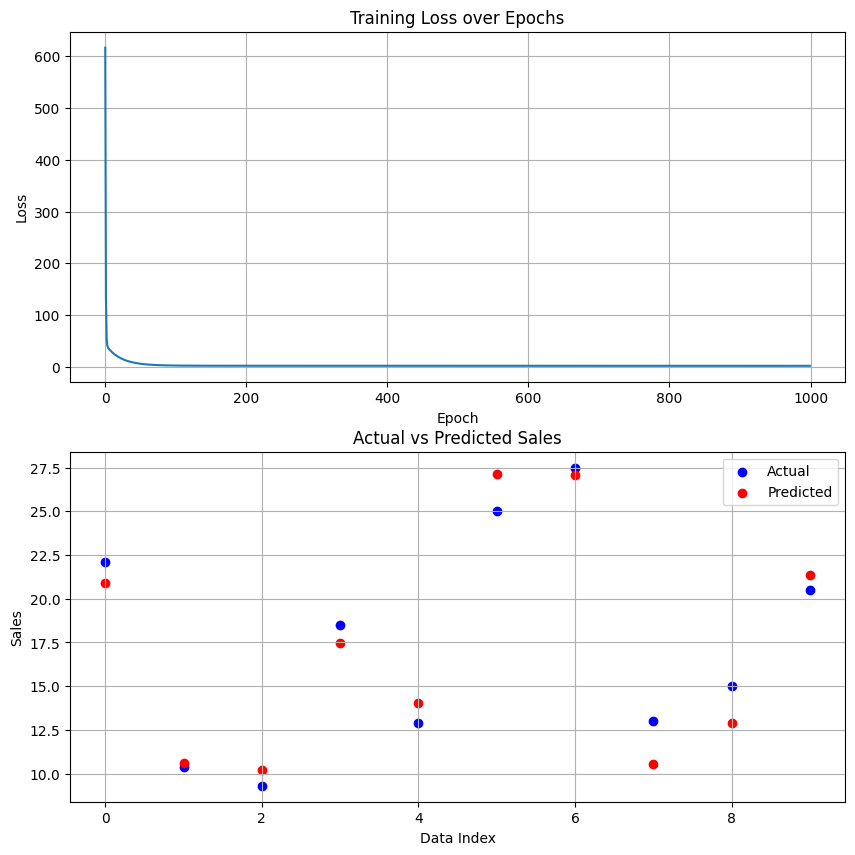

Model Parameters:
linear.weight: tensor([[ 0.2047,  0.4939, -0.0731]])
linear.bias: tensor([0.5098])


In [48]:
# 실습. 다중 선형 회귀 구현(내 풀이)

# 문제
# 1. 데이터 입출력
# • TV, 라디오, 신문 광고비를 입력으로 받고 판매량을 예측합니다.
# 2. 모델 정의
# • 다중 선형 회귀 모델을 정의하세요.
# 3. 손실함수 설정과 가중치 업데이트
# • 손실 함수로 MSELoss를 사용하고, 최적화 알고리즘으로 SGD를 사용하세요.
# • 학습률은 0.0001로 설정하세요.
# • 1000번의 에포크 동안 학습시키세요.
# 4. 결과 분석
# • 학습이 완료된 후, 모델의 가중치와 편향을 출력하세요.
# • 학습 데이터에 대한 실제 값과 예측 값을 비교하는 산점도 그래프를 그리세요.

# 1. 데이터 정의 (10개 샘플)
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)    

# 2. 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self,):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3,1) 

    def forward(self,x):
        return self.linear(x)

model = MultipleLinearRegression()   

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()    
optimizer = optim.SGD(model.parameters(), lr=0.0001)  

# 4. 기울기 업데이트 (학습)
epochs = 1000   
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()  
    outputs = model(x) 
    loss = criterion(outputs, y)    
    loss.backward()     
    optimizer.step()    

    losses.append(loss.item())     

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 테스트 데이터 평가
with torch.no_grad():
    y_pred = model(x)

# 6. 결과 시각화
plt.figure(figsize=(10,10))

# 손실 감소 그래프
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(2, 1, 2)
plt.scatter(range(len(x)), y.numpy(), color='blue', label="Actual")
plt.scatter(range(len(x)), y_pred.numpy(), color='red', label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100/1000], Loss:  3.0818
Epoch [200/1000], Loss:  2.7889
Epoch [300/1000], Loss:  2.6650
Epoch [400/1000], Loss:  2.5675
Epoch [500/1000], Loss:  2.4899
Epoch [600/1000], Loss:  2.4280
Epoch [700/1000], Loss:  2.3787
Epoch [800/1000], Loss:  2.3393
Epoch [900/1000], Loss:  2.3077
Epoch [1000/1000], Loss:  2.2823


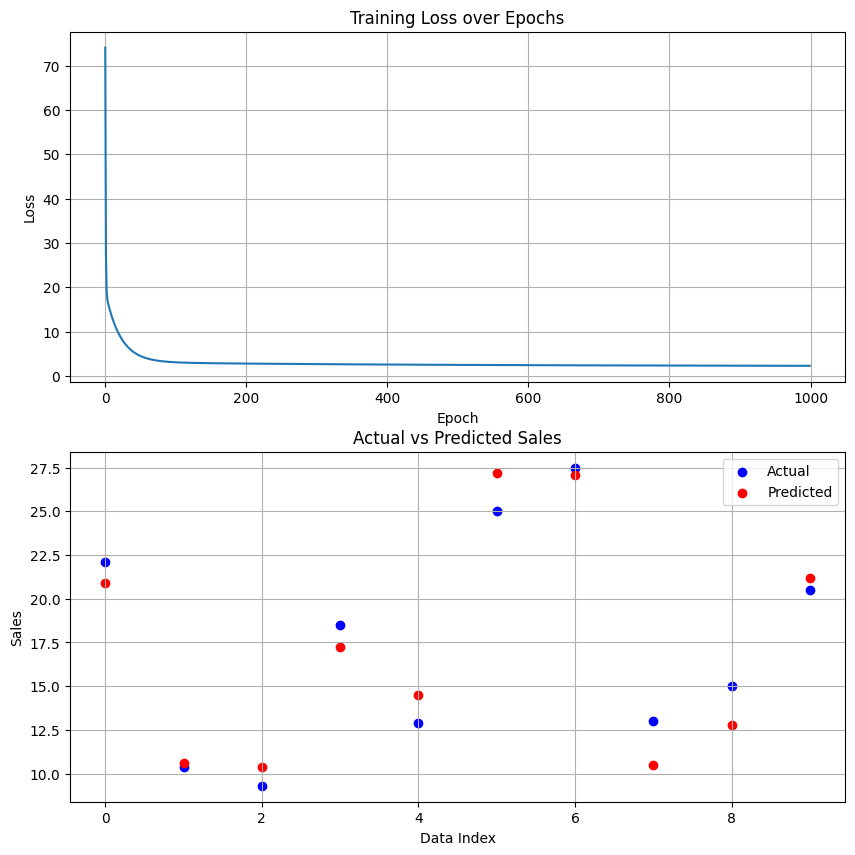

Model Parameters:
linear.weight: tensor([[ 0.2046,  0.4405, -0.0173]])
linear.bias: tensor([0.1620])


In [47]:
# 실습. 다중 선형 회귀 구현(강사님 풀이)

# 1. 데이터 정의 (10개 샘플)
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)    

# 2. 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self,):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3,1) 

    def forward(self,x):
        return self.linear(x)

model = MultipleLinearRegression()   

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()    
optimizer = optim.SGD(model.parameters(), lr=0.0001)  

# 4. 기울기 업데이트 (학습)
epochs = 1000   
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()  
    outputs = model(x) 
    loss = criterion(outputs, y)    
    loss.backward()     
    optimizer.step()    

    losses.append(loss.item())     

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,10))

# 손실 감소 그래프
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(2, 1, 2)
plt.scatter(range(len(y.numpy())), y.numpy(), color='blue', label="Actual")
plt.scatter(range(len(model(x).detach().numpy())), y_pred.numpy(), color='red', label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")